<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°03

## Objetivos del laboratorio

* Reforzar conceptos básicos de análisis no supervisado.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

## 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables numéricas a categóricas ocupando el comando **get_dummies** de pandas ([refrenecia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


In [14]:
##### 1 #####

aux_num=[]                            # Definimos una lista vacía para los datos numéricos 
aux_cat=[]                            # Definimos una lista vacía para los datos categóricos
for column in df.columns:              # Recorremos las columnas de df
    if df[column].dtype== 'object':   # Si el tipo de los datos de la columna es categorica
        aux_cat.append(column)        # Lo agregamos a la lista de categoricas
    else:               
        aux_num.append(column)        # De lo contrario lo agregamos a la de numéricas
        
df_num=df.drop(aux_cat,axis=1)        # Al dataframe le quitamos los categoricos, luego tenemos uno numérico

for column in df_num.columns:                          # Recorremos las columnas de df_num
    if df_num[column].notnull().all() == False:       # Revisamos si existe un null en la columna
        df_num = df_num.fillna(df_num[column].mean()) # Si existe, cambiarlos por el promedio de su columna

escalador=MinMaxScaler()                                  # Llamamos a MinMaxScaler
df_num[aux_num]= escalador.fit_transform(df_num[aux_num]) # Normalizamos los datos usando MinMaxScaler

df_num.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294


In [15]:
##### 2 #####

df_cat=df.drop(aux_num,axis=1)        # Al dataframe le quitamos los numericos, luego tenemos uno categorico

df_cat_dum=pd.get_dummies(df_cat)     # Utilizamos get_dummies para cambiar los categoricos a numericos

#Lo que hace get_dummies es asociar cada categoría a un valor discreto, por ejemplo si fuesen colores podría 
#Asociar rojo=1,Amarillo=2,Verde=3,Azul=4.... y cambiar las categorías en la dataframe por los respectivos
#Valores previamente asociados.

df_cat_dum.head()

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [16]:
##### 3 #####

df_procesado=df_num.join(df_cat_dum)  # Juntamos a df_num con df_cat_dum 
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


## 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de 8 clusters.
2. Calcular los cluster y el valor de los centroides.
3. Realizar que resumas las principales cualidades de cada cluster. Para  cada cluster calcule:

    a. Valor promedio de las variables numérica.\
    b. Moda para las variables numericas
    
    

In [29]:
##### 1 #####

from sklearn.cluster import KMeans   # Importamos KMeans

kmeans = KMeans()                    # Llamamos a KMeans
kmeans.fit(df_procesado)             # Ajustamos el dataframe df_procesado

centros = kmeans.cluster_centers_  # Definimos los centros
cluster = kmeans.labels_            # Definimos los clusters

In [33]:
##### 2 #####

df_procesado['cluster']=cluster                                         # Creo una columna para los clusters
df_procesado['cluster']=df_procesado['cluster'].astype('category')      # Categorizo los clusters de df_procesado
centros_df_procesado=pd.DataFrame(centros,columns=df_procesado.columns) # Contruyo un DataFrame con los centros y 
                                                                        # columnas del df_procesado
centros_df_procesado['cluster']=[1,2,3,4,5,6,7,8]                       # Le ponemos nombre a los clusters

print(centros)                    # Muestro los centros
df_procesado['cluster'].unique()  # Muestro los clusters

[[ 5.24299806e-01  2.50770169e-01  1.95501562e-01  3.04420266e-01
   2.26575244e-01  6.22875017e-02  9.50632395e-02  4.56956344e-02
   1.53542772e-01  4.48524412e-01  1.44022848e-01  7.47994016e-03
   4.33836529e-02  2.23038216e-01  7.76961784e-01  6.36202910e-01
   3.63797090e-01  8.15993472e-04  6.61090711e-01  4.58316333e-02
   2.92261662e-01  7.19434245e-02  2.55133959e-01  8.02393581e-03
   2.86957704e-01  3.77804978e-01 -3.30291350e-15  9.76880185e-01
   2.10942375e-15 -3.02535774e-15  2.31198150e-02 -9.99200722e-16
   9.92248062e-01  6.39194886e-03 -2.96984659e-15  1.35998912e-03
   3.00000000e+00]
 [ 4.38403782e-01  1.59576231e-01  1.41135424e-01  2.42287290e-01
   1.56504499e-01  1.64071190e-02  1.24860957e-01  6.39599555e-03
   9.28809789e-02  7.09955506e-01  3.64293660e-02  2.22469410e-03
   1.08453838e-02  4.42157953e-02  9.55784205e-01 -4.21884749e-15
   1.00000000e+00  3.25260652e-18  8.08954394e-01  5.31145717e-02
   1.37931034e-01  8.04911693e-16 -1.05471187e-15 -1.9706

[3, 7, 0, 1, 4, 2, 5, 6]
Categories (8, int64): [3, 7, 0, 1, 4, 2, 5, 6]

In [38]:
##### 3 #####

for i in range(1,9):
    print("**********  media del cluster ",i,"  **********")
    print(df_procesado[df_procesado['cluster']==i-1][aux_num].mean()) # media de cada cluster
    print("")
    print("**********  moda de cluster ",i,"  **********")
    print(str(df_procesado[df_procesado['cluster']==i-1][aux_num].mode())) # moda de cada cluster
    print("")

**********  media del cluster  1   **********
year                    0.524300
desplazamiento          0.250770
cilindros               0.195502
co2                     0.304420
consumo_litros_milla    0.226575
dtype: float64

**********  moda de cluster  1   **********
       year  desplazamiento  cilindros       co2  consumo_litros_milla
0  0.823529        0.179487   0.142857  0.317749               0.24183

**********  media del cluster  2   **********
year                    0.438404
desplazamiento          0.159576
cilindros               0.141135
co2                     0.242287
consumo_litros_milla    0.156504
dtype: float64

**********  moda de cluster  2   **********
       year  desplazamiento  cilindros       co2  consumo_litros_milla
0  0.029412        0.179487   0.142857  0.275108              0.194444

**********  media del cluster  3   **********
year                    0.588065
desplazamiento          0.362121
cilindros               0.299467
co2                     0.3

## 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [40]:
secuencia=[5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in secuencia]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]

df_codo = pd.DataFrame({'número de clusters':secuencia,
                        'score':score})

df_codo.head()

,número de clusters,score
0,5,122914.655028
1,10,84330.678023
2,20,67680.152552
3,30,56542.684755
4,50,45637.351159


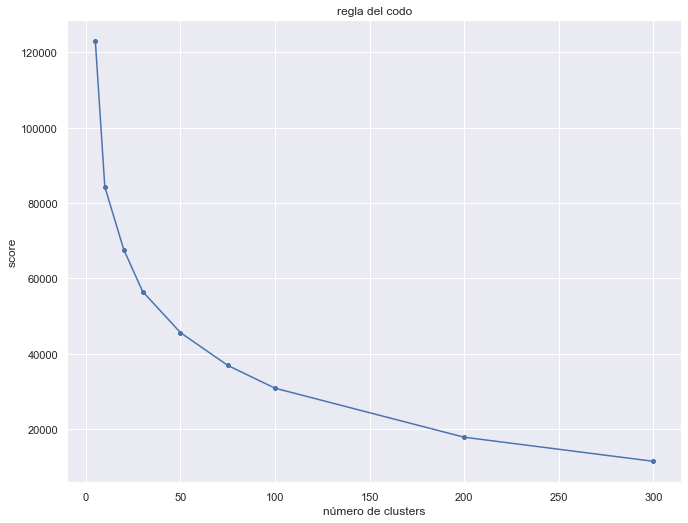

In [41]:
fig, ax = plt.subplots(figsize=(11, 8.5))

plt.title('regla del codo')

sns.lineplot(x="número de clusters",
             y="score",
            data=df_codo)

sns.scatterplot(x="número de clusters",
             y="score",
             data=df_codo)